# Assignment 1

### <span style="color:chocolate"> Submission requirements </span>

Your work will not be graded if your notebook doesn't include output. In other words, <span style="color:red"> make sure to rerun your notebook before submitting to Gradescope </span> (Note: if you are using Google Colab: go to Edit > Notebook Settings  and uncheck Omit code cell output when saving this notebook, otherwise the output is not printed).

Additional points may be deducted if these requirements are not met:

    
* Comment your code;
* Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own;
* Try and minimize the use of the global namespace (meaning, keep things inside functions).
---

### Import libraries

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Define functions

In [2]:
def create_1d_data(num_examples, w, b, bound):
  """Create X, Y data with a linear relationship with added noise.

  Args:
    num_examples: number of examples to generate
    w: desired slope
    b: desired intercept
    bound: lower and upper boundary of the data interval

  Returns:
    X and Y with shape (num_examples)
  """
  np.random.seed(4)  # consistent random number generation
  X = np.arange(num_examples)
  deltas = np.random.uniform(low=-bound, high=bound, size=X.shape) # added noise
  Y = b + deltas + w * X

  return X, Y

---
### Step 1: Data ingestion

Supervised learning is all about learning to make predictions: given an input $x$ (e.g. home square footage), can we produce an output $\hat{y}$ (e.g. estimated value) as close to the actual observed output $y$ (e.g. sale price) as possible. Note that the "hat" above $y$ is used to denote an estimated or predicted value.

Let's start by generating some artificial data. We'll create a vector of inputs, $X$, and a corresponding vector of target outputs $Y$. In general, we'll refer to invidual examples with a lowercase ($x$), and a vector or matrix containing multiple examples with a capital ($X$).

### <span style="color:chocolate">Exercise 1:</span> Create data (10 points)

Create artificial data using the function <span style="color:chocolate">create_1d_data()</span> defined at the top of this notebook. Set the following argument values:
- number of examples = 70;
- slope (w) = 2;
- intercept (b) = 1;
- bound = 1.

Denote the output by X and Y. Print the shape and the first 10 elements for each object.

In [66]:
# YOUR CODE HERE
# Creating artificial data using function create_1d_data()
[X, Y] = create_1d_data(70, 2, 1, 1)

# Print the shape and the first 10 elements for each object.
print(f"The shape of the artificial data matrix (X): {X.shape}")
print(f"The first 10 elements of the vector of inputs (X): {X[:10]}")
print(f"The first 10 elements of the vector of outputs (Y): {Y[:10]}")

The shape of the artificial data matrix (X): (70,)
The first 10 elements of the vector of inputs (X): [0 1 2 3 4 5 6 7 8 9]
The first 10 elements of the vector of outputs (Y): [ 1.93405968  3.0944645   5.94536872  7.42963199  9.39545765 10.43217899
 13.95254891 14.01246051 16.50596472 18.86958306]


---
### Step 2: Data preprocessing

Given the simplicity of the data (just one feature in X), our sole task here is to divide the data into training and test sets.

### <span style="color:chocolate">Exercise 2:</span> Data splits (10 points)

Using the <span style="color:chocolate">train_test_split()</span> method available in scikit-learn:
1. Split the (X,Y) data into training and test paritions by setting test_size=0.3 and random_state=1234. All the other arguments of the method are set to default values. Name the resulting arrays X_train, X_test, Y_train, Y_test;
2. Print the shape of each array.

In [11]:
# YOUR CODE HERE

# Splitting the (X,Y) data into training and test data partitions
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=1234)

# Printing the shape of each array
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"Y_test shape: {Y_test.shape}")

X_train shape: (49,)
X_test shape: (21,)
Y_train shape: (49,)
Y_test shape: (21,)


---
### Step 3: Exploratory data analysis (EDA)

EDA helps us to gain insights into the distribution and characteristics of the dataset we are dealing with. 
This understanding is fundamental for making informed decisions regarding:
- data cleaning;
- feature selection;
- model building;
- model evaluation, etc.

### <span style="color:chocolate">Exercise 3:</span> Plots (10 points)

1. Generate a scatter plot displaying the X_train data along the x-axis and the Y_train data along the y-axis, ensuring clear labeling of both axes. Add a title "Exploratory Data Analysis: Training Data" and a legend "observed training data" to the plot;
2. Enhance the plot by incorporating a vertical red line to denote the mean value of X_train. Accompany it with a legend clarifying the meaning of the line and the mean value of X_train.

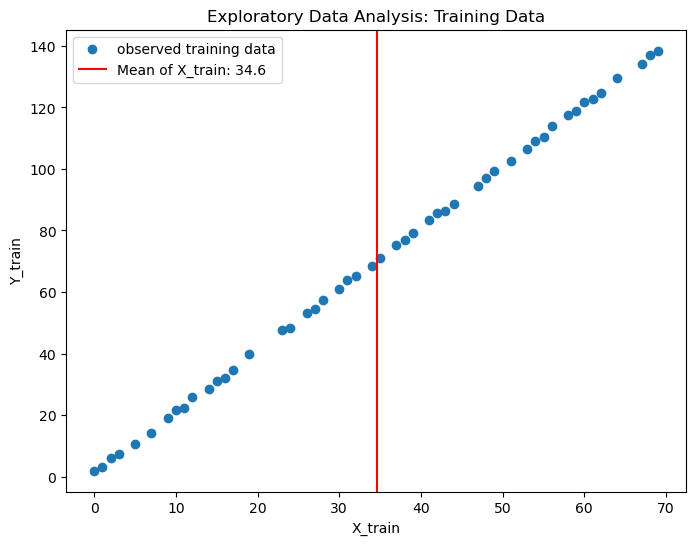

In [23]:
# YOUR CODE HERE

# Initialize the scatter plot 8 inch by 6 inch
plt.figure(figsize=(8,6))
plt.scatter(X_train, Y_train, label="observed training data")

# Calculating the mean of the X training data
mean_X_train = np.mean(X_train)

# Add the vertical red line at the mean of X_train
plt.axvline(x=mean_X_train, color='red', label=f"Mean of X_train: {mean_X_train:.1f}")

# Labeling the axes
plt.xlabel('X_train')
plt.ylabel('Y_train')

# Adding the title and legend
plt.title("Exploratory Data Analysis: Training Data")
plt.legend()

# Show the plot
plt.show()

---
### Step 4: Modeling

In this section, our objective is to propose models to describe the data generation process. Remember a model is a function that takes an input $x$ and produces a prediction $\hat{y}$.

Let's consider two possible models for this data:
1. $M_1(x) = 5+x$ 
2. $M_2(x) = 1+2x$

### <span style="color:chocolate">Exercise 4:</span> Models for data (10 points)

1. Compute the predictions of models $M_1$ and $M_2$ for the values in X_train. These predictions should be vectors of the same shape as Y_train. Call these predictions M1_hat_train and M2_hat_train. Hint: the "learned" parameters are alredy provided to you;
2. Plot the prediction lines of these two models overlayed on the observed data (X_train, Y_train). Note: you will generate only one plot. Make sure to include axes names, titles and legend. 

Y_train shape: (49,)
M1_hat_trained shape: (49,)
M2_hat_trained shape: (49,)


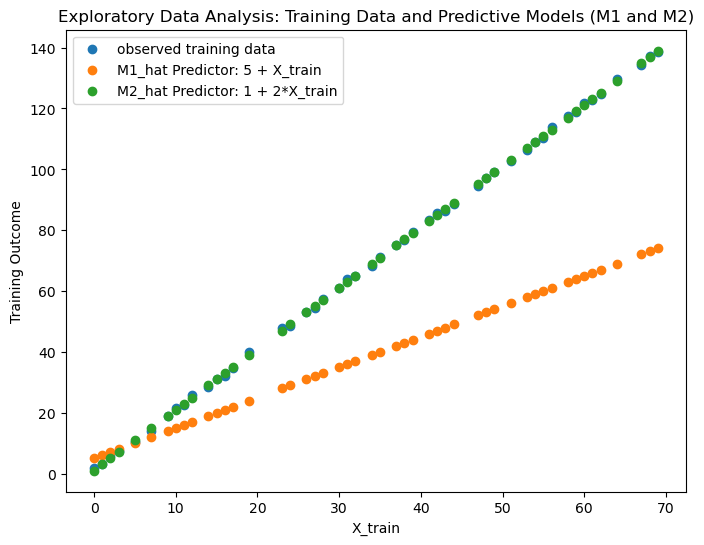

In [73]:
# YOUR CODE HERE

# Compute the predictions of models M1 and M2
M1_hat_trained = 5 + X_train
M2_hat_trained = 1 + 2*X_train

# Compare the model shapes to Y_train
print(f"Y_train shape: {Y_train.shape}")
print(f"M1_hat_trained shape: {M1_hat_trained.shape}")
print(f"M2_hat_trained shape: {M2_hat_trained.shape}")

# Plot the prediction lines of the two models on the previous plot
# Initialize the scatter plot 8 inch by 6 inch
plt.figure(figsize=(8,6))
plt.scatter(X_train, Y_train, label="observed training data")
plt.scatter(X_train, M1_hat_trained, label="M1_hat Predictor: 5 + X_train")
plt.scatter(X_train, M2_hat_trained, label="M2_hat Predictor: 1 + 2*X_train")

# Labeling the axes
plt.xlabel('X_train')
plt.ylabel('Training Outcome')

# Adding the title and legend
plt.title("Exploratory Data Analysis: Training Data and Predictive Models (M1 and M2)")
plt.legend()

# Show the plot
plt.show()

---
### Step 5: Evaluation and Generalization

How good are our models? Intuitively, the better the model, the more closely it fits the data we have. That is, for each $x$, we'll compare $y$, the true value, with $\hat{y}$, the predicted value. This comparison is often called the *loss* or the *error*. One common such comparison is *squared error*: $(y-\hat{y})^2$. Averaging over all our data points, we get the *mean squared error*:

\begin{equation}
\textit{MSE} = \frac{1}{n} \sum_{y_i \in Y}(y_i - \hat{y}_i)^2
\end{equation}

How well do our models generalize? The test dataset serves as a proxy for unseen data in real-world applications. By evaluating the model on the test data, you can assess its ability to generalize beyond the training data. This ensures that the model can make accurate predictions on new data it hasn't seen during training.

### <span style="color:chocolate">Exercise 5:</span> Computing MSE (20 points)

1. Write a function for computing the MSE metric based on the provided definition;
2. Utilizing this function, calculate the training data MSE for the two models, $M_1$ and $M_2$.
3. Comment on which model fits the training data better.

In [28]:
# YOUR CODE HERE
def MSE(true_values, predicted_values):
  """Return the MSE between true_values and predicted values."""
  mse_value = np.mean((true_values - predicted_values)**2)
  return mse_value  

In [40]:
# YOUR CODE HERE
# Calculate the training data MSE for models M1 and M2
MSE_M1_train = round(MSE(Y_train, M1_hat_trained), 4)
MSE_M2_train = round(MSE(Y_train, M2_hat_trained), 4)

# Print the MSE values
print(f"MSE for Model 1 (M1: 5 + X_train): {MSE_M1_train}")
print(f"MSE for Model 2 (M2: 1 + 2*X_train): {MSE_M2_train}")

# MSE analysis
print(f"Model 2 has a MSE of {MSE_M2_train}, compared to the MSE of Model 1 {MSE_M1_train}.",
      "\nDue to the lower MSE of Model 2, it is the better fit model for the training data.")

MSE for Model 1 (M1: 5 + X_train): 1358.2515
MSE for Model 2 (M2: 1 + 2*X_train): 0.3136
Model 2 has a MSE of 0.3136, far better than the MSE of Model 1 1358.2515, 
thereby proving itself to be the better fit model for the training data.


### <span style="color:chocolate">Exercise 6:</span> Generalization (15 points)

1. Compute the predictions of models $M_1$ and $M_2$ for the values in X_test. These predictions should be vectors of the same shape as Y_test. Call these predictions M1_hat_test and M2_hat_test.
2. Calculate the test data MSE for the two models, $M_1$ and $M_2$, using the <span style="color:chocolate">MSE()</span> function defined above.
3. Does the model you chose in Exercise 5 generalize well?

In [46]:
# YOUR CODE HERE
# Compute the predictions of models M1 and M2
M1_hat_test = 5 + X_test
M2_hat_test = 1 + 2*X_test

# Compare the model_test shapes to Y_train
print(f"Y_test shape: {Y_test.shape}")
print(f"M1_hat_trained shape: {M1_hat_test.shape}")
print(f"M2_hat_trained shape: {M2_hat_test.shape}")

# Calculate the test data MSE for the M1 and M2 models
MSE_M1_test = round(MSE(Y_test, M1_hat_test), 4)
MSE_M2_test = round(MSE(Y_test, M2_hat_test), 4)

# Print the MSE values
print(f"MSE for Model 1 (M1: 5 + X_test): {MSE_M1_test}")
print(f"MSE for Model 2 (M2: 1 + 2*X_test): {MSE_M2_test}")

# MSE analysis
print(f"Model 2 has a MSE of {MSE_M2_test}, compared to the MSE of Model 1 {MSE_M1_test}.",
      "\nDue to the lower MSE of Model 2, it is the better fit model for the test data.",
      "\nIn this instance, the generalization has held true for the model chosen in exercise 5.")

Y_test shape: (21,)
M1_hat_trained shape: (21,)
M2_hat_trained shape: (21,)
MSE for Model 1 (M1: 5 + X_test): 1300.104
MSE for Model 2 (M2: 1 + 2*X_test): 0.337
Model 2 has a MSE of 0.337, compared to the MSE of Model 1 1300.104. 
Due to the lower MSE of Model 2, it is the better fit model for the test data. 
In this instance, the generalization has held true for the model chosen in exercise 5.


### <span style="color:chocolate">Exercise 7:</span> More features (25 points)

1. Fit an 8-th degree polynomial to (X_train, Y_train). Call the predictions of this model M3_hat_train. Hint: see <span style="color:chocolate">np.polyfit()</span> for details.
2. Plot the prediction lines of the $M_3$ overlayed on the observed data (X_train, Y_train). Note: you will generate only one plot. Make sure to include axes names, titles and legend. 
3. Calculate the training data MSE for the $M_3$ model using the <span style="color:chocolate">MSE()</span> function defined above.
4. Does model $M_3$ do better than your chosen model in Exercise 5 at predicting the labels for new unseen data? Hint: your new unseen data is the test dataset.

Y_train shape: (49,)
M3_hat_trained shape: (49,)


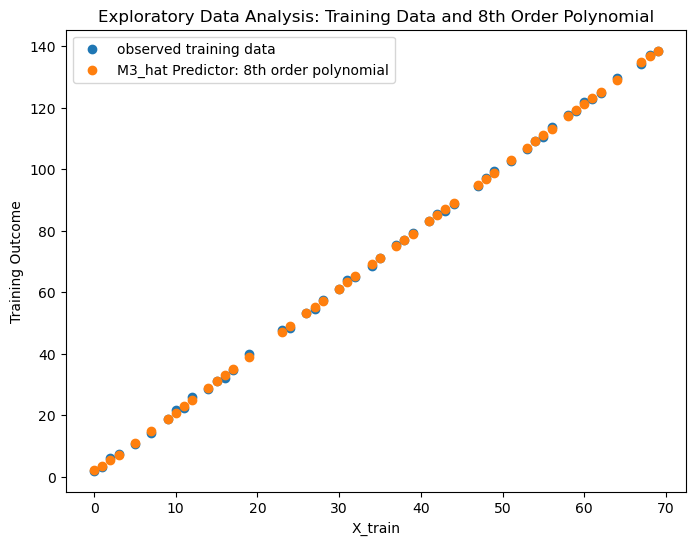

MSE for Model 3 Train (M3: 8th order polynomial): 0.2659

The MSE of Model 3 Test is 0.3968. Compared to the MSE of Model 2 Test 0.337, 
Model 3 test is comparable but eclipsed by Model 2's lower MSE. 
Model 2, when looking at the MES on test data, is the better model.


In [71]:
# YOUR CODE HERE
# Fitting an eighth degree polynomial to X_train and Y_train
M3_hat_coefficients = np.polyfit(X_train, Y_train, 8)
M3_hat_train = np.polyval(M3_hat_coefficients, X_train)

# Compare the model shapes to Y_train
print(f"Y_train shape: {Y_train.shape}")
print(f"M3_hat_trained shape: {M3_hat_train.shape}")

# Plot the prediction lines of the two models on the previous plot
# Initialize the scatter plot 8 inch by 6 inch
plt.figure(figsize=(8,6))
plt.scatter(X_train, Y_train, label="observed training data")
plt.scatter(X_train, M3_hat_train, label="M3_hat Predictor: 8th order polynomial")

# Labeling the axes
plt.xlabel('X_train')
plt.ylabel('Training Outcome')

# Adding the title and legend
plt.title("Exploratory Data Analysis: Training Data and 8th Order Polynomial")
plt.legend()

# Show the plot
plt.show()

# MSE for M3_hat_train
MSE_M3_train = round(MSE(Y_train, M3_hat_train), 4)
print(f"MSE for Model 3 Train (M3: 8th order polynomial): {MSE_M3_train}")

# MSE for M3_hat_test
M3_hat_test = np.polyval(M3_hat_coefficients, X_test)
MSE_M3_test = round(MSE(Y_test, M3_hat_test), 4)


# MSE M3_train analysis
print(f"\nThe MSE of Model 3 Test is {MSE_M3_test}. Compared to the MSE of Model 2 Test {MSE_M2_test},",
      "\nModel 3 test is comparable but eclipsed by Model 2's lower MSE.",
      "\nModel 2, when looking at the MES on test data, is the better model.")

----
#### <span style="color:chocolate">Additional practice question</span> (not graded)

Would you perform EDA on the test dataset?
1. Why or why not?
2. Provide a link to a paper/article to support your answer.

In [ ]:
# YOUR ANSWER HERE